In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# <font color='green'>Step1:Data Understanding</font>

In [10]:
# Read the data from csv file

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Describe the data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# Get information about the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


## <font color='orange'>1a:NULL value check</font>

In [13]:
# Check for NULL values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Observation:
There is no NULL value in any column,so imputation is not needed

In [14]:
#Getting the shape of the data
bike.shape

(730, 16)

## <font color='orange'>1b:Drop Unnecessary columns</font>

##### Observation:
We will drop below variables--

1.instant is just the index of rows and doesnt add any value hence will be dropped

2.casual and registered together sum up to target variable cnt hence both will be dropped

3.dteday will be dropped since month and year data is already present in other columns

In [15]:
bike.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)

## <font color='orange'>1c:Transformations for better Visualizations</font>

In [16]:
# Transform month column
bike.mnth = bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [17]:
# Transform weekday column
bike.weekday = bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [18]:
# Transform season column
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [19]:
# Transform weathersit column
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist',3:'Light_SnowRainThunder',4:'Heavy_SnowRainThunder'})

In [20]:
#Transform year column
bike.yr = bike.yr.map({0:'2018', 1:'2019'})

In [21]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# <font color='green'>Step2:Data Visualization</font>

## <font color='orange'>2a:Visualize Numeric Variables</font>

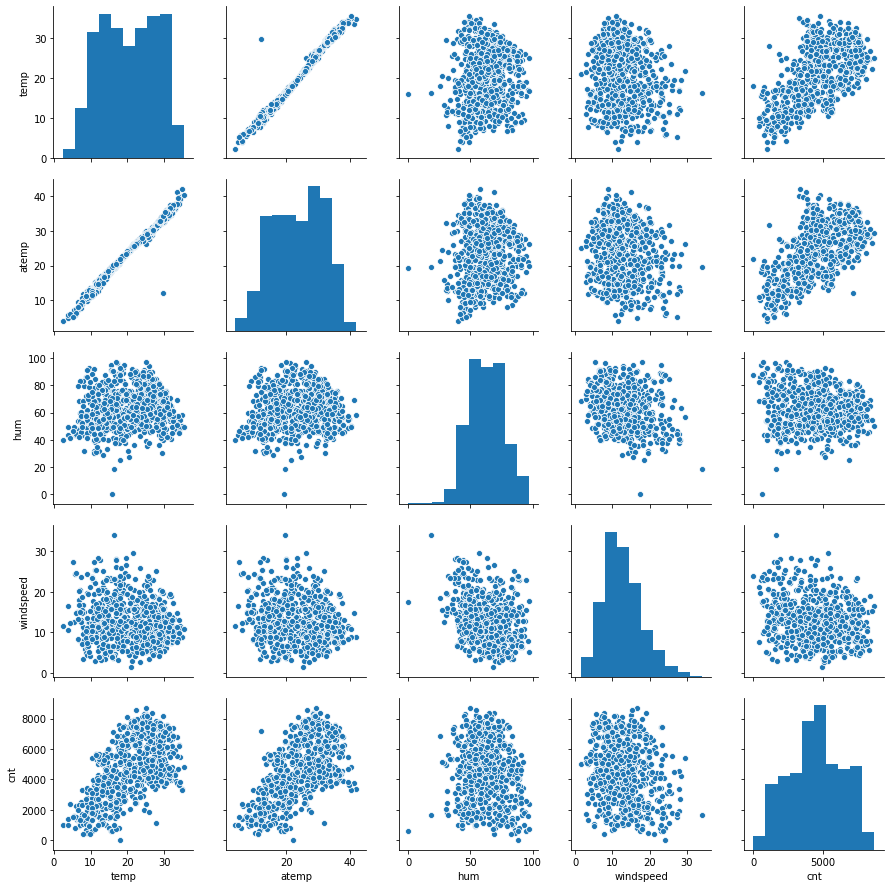

In [22]:
#Pairplot to visualize relationship between numeric variables
sns.pairplot(data=bike,vars=['temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()

##### Observation:

1.temp and atemp have linear relationship and we should check correlation between them.

2.Ride count somewhat increases with increase in temperature.

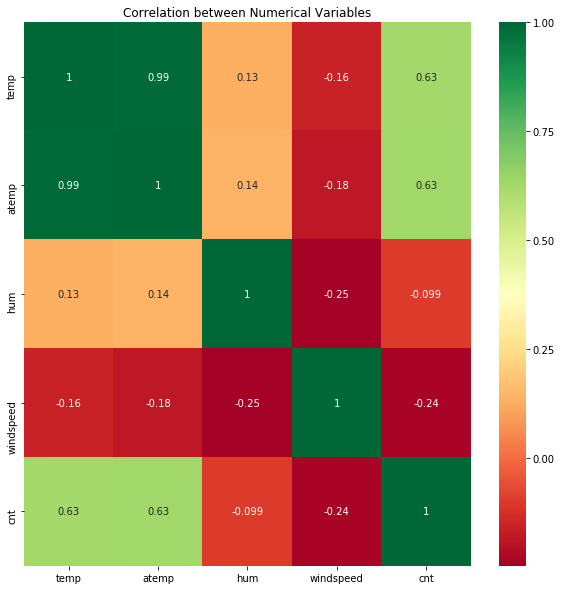

In [23]:
#Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

In [24]:
#Drop the variable atemp
bike.drop(['atemp'], axis=1 ,inplace=True)

##### Observation:

1.There is a very high correlation between temp and atemp(0.99),so atemp will be dropped.

2.There is a negative correlation between windspeed and number of rides(cnt)

## <font color='orange'>2b:Visualize Categorical Variables</font>

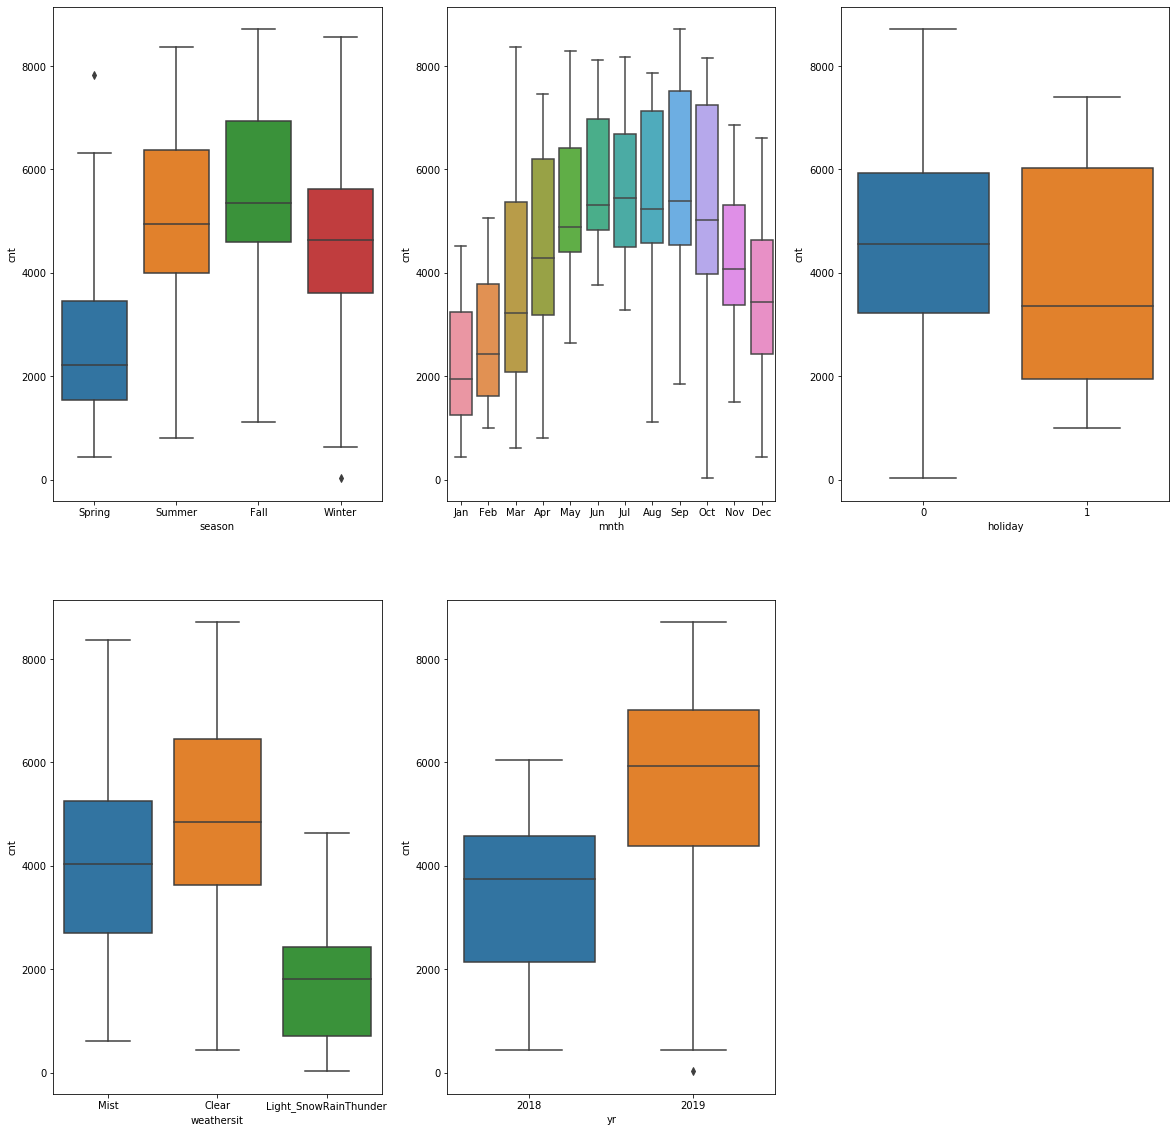

In [25]:
plt.figure(figsize=(20, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

##### Observation:

1.Spring season has least number of Bike sharing whereas Fall has maximum

2.August,September and October months have maximum number of bike shares whereas January,February have least.

3.The mean value of ride counts is more when it is not a holiday.

4.Ride count is maximum in clear weather.

5.Ride count has increased in 2019 compared to 2018.

6.There is no rides when it is Heavy-snow,Rain,Thunder

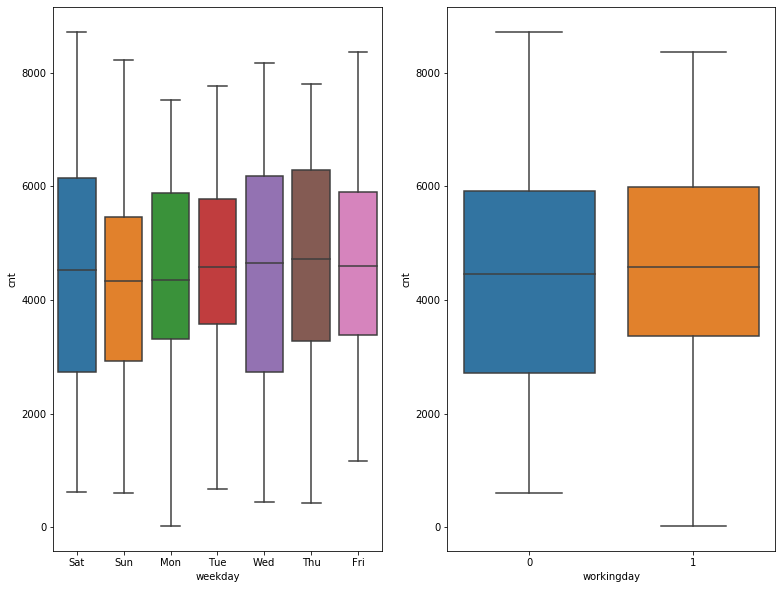

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

##### Observation:

1.The mean value of ride count is almost similar on all the Weekdays

2.There is not much noticeable difference between ride counts when it is working or non-working day.

# <font color='green'>Step3:Data Preparation</font>

In [27]:
#Set year back to 0 and 1 as visualization of categorical variables is done
bike.yr = bike.yr.map({'2018':0,'2019':1})

In [28]:
#Check the dataframe
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


## <font color='orange'>3a:Dummy Variables</font>

In [29]:
#Create dummy variables for season , month, weekday ,weathersit
dummy_var = bike[['season','mnth','weekday','weathersit']]
dummy_var = pd.get_dummies(dummy_var,drop_first=True )

In [30]:
#Concat dummy variable data to original data
bike = pd.concat([bike,dummy_var] , axis=1)

In [31]:
#Delete the original columns for which dummy variables were created
bike.drop(['season','mnth','weekday','weathersit'], axis=1,inplace=True)

In [32]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_SnowRainThunder,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
bike.shape

(730, 29)

In [34]:
#Check column information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                                  730 non-null int64
holiday                             730 non-null int64
workingday                          730 non-null int64
temp                                730 non-null float64
hum                                 730 non-null float64
windspeed                           730 non-null float64
cnt                                 730 non-null int64
season_Spring                       730 non-null uint8
season_Summer                       730 non-null uint8
season_Winter                       730 non-null uint8
mnth_Aug                            730 non-null uint8
mnth_Dec                            730 non-null uint8
mnth_Feb                            730 non-null uint8
mnth_Jan                            730 non-null uint8
mnth_Jul                            730 non-null uint8
mnth_Jun                            730 non-null uint8
mnth_Mar 

# <font color='green'>Step4:Test-Train Split</font>

In [35]:
#Split into train and test set
train,test = train_test_split(bike, train_size=0.7 , test_size = 0.3, random_state =100 )

In [36]:
#Check shape of train set
train.shape

(510, 29)

In [37]:
#Check shape of test set
test.shape

(219, 29)

# <font color='green'>Step5:Feature Scaling</font>

In [38]:
#create object of MinMax Scaler
scaler= MinMaxScaler()

In [39]:
#Do feature scaling for numeric variables in the training set
num= ['temp','hum','windspeed','cnt']
train[num] = scaler.fit_transform(train[num])

In [40]:
train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_SnowRainThunder,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


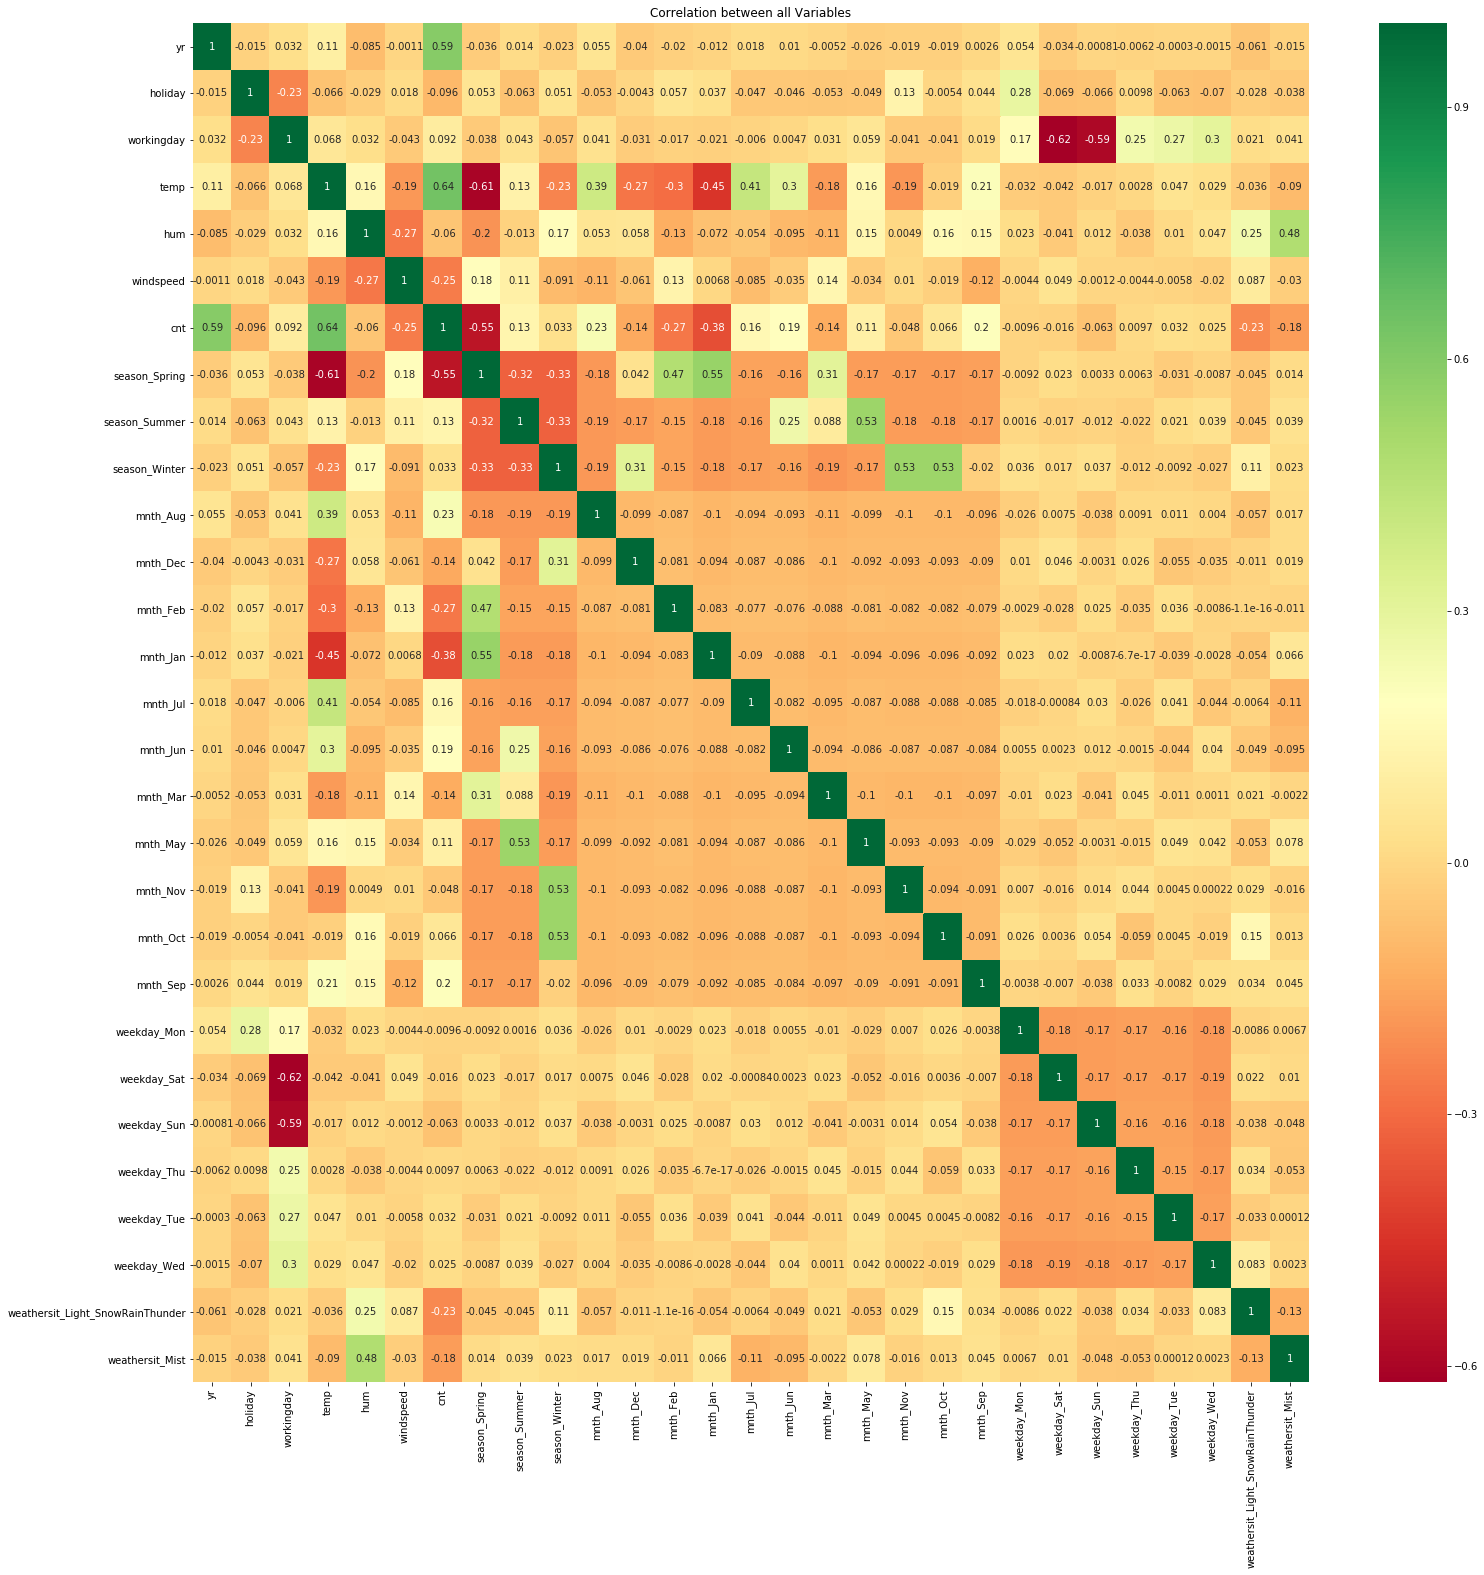

In [41]:
#Plot correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(train.corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between all Variables")
plt.show()

##### Observation:

We dont see a very high correlation between two variables so we can proceed safely 

# <font color='green'>Step6:Modelling using Linear Regression</font>

In [42]:
#Create X and y variable from training set
y_train = train.pop('cnt')
X_train = train

In [43]:
#Define the Linear Regression model and fit it on training data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## <font color='orange'>6a:Recursive Feature Elimination(RFE)</font>

In [44]:
#Define RFE with 20 features
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [45]:
#Get the list of top 20 features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 6),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 7),
 ('weathersit_Light_SnowRainThunder', True, 1),
 ('weathersit_Mist', True, 1)]

In [46]:
#Get the list of columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light_SnowRainThunder',
       'weathersit_Mist'],
      dtype='object')

In [47]:
#Get the list of columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## <font color='orange'>6b:VIF Function</font>

In [48]:
#Create a function for VIF since multiple lines of code will be reused
def get_Vif_values(dataframe):
    vif = pd.DataFrame()
    X = dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

## <font color='orange'>6c:Model-1 Fitting using Statsmodel</font>

In [49]:
#Training set with all RFE selected features
X_train_rfe= X_train[col]

In [50]:
# Add a constant variable for statsmodel
X_train_rfe = sm.add_constant(X_train_rfe)
#Fit the model
lm = sm.OLS(y_train,X_train_rfe).fit()
#Print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.59e-189
Time:                        20:35:49   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2487      0.030      8.252      0.000       0.190       0.308
yr                                   0.2317      0.008     29.150      0.000       0.216       0.247
holiday                              0.0006      0.022      0.030      0.976      -0.042       0.043
workingday                           0.0939      0.010      9.497      0.000       0.074       0.113
temp                                 0.4500      0.038     11.796      0.000       0.375       0.525
hum                                 -0.1521      0.038     -4.055      0.000      -0.226      -0.078
windspeed                           -0.1868      0.025     -7.365      0.000      -0.237      -0.137
season_Spring                       -0.0560      0.022     -2.563      0.011      -0.099      -0.013
season_Summer                        0.0269      0.017      1.593      0.112      -0.006       0.060
season_Winter                        0.1012      0.018      5.705      0.000       0.066       0.136
mnth_Dec                            -0.0506      0.018     -2.807      0.005      -0.086      -0.015
mnth_Feb                            -0.0355      0.021     -1.661      0.097      -0.077       0.006
mnth_Jan                            -0.0658      0.021     -3.110      0.002      -0.107      -0.024
mnth_Jul                            -0.0512      0.018     -2.858      0.004      -0.086      -0.016
mnth_May                             0.0250      0.017      1.449      0.148      -0.009       0.059
mnth_Nov                            -0.0483      0.019     -2.592      0.010      -0.085      -0.012
mnth_Sep                             0.0718      0.017      4.324      0.000       0.039       0.104
weekday_Sat                          0.1044      0.012      8.795      0.000       0.081       0.128
weekday_Sun                          0.0497      0.012      4.025      0.000       0.025       0.074
weathersit_Light_SnowRainThunder    -0.2564      0.026     -9.847      0.000      -0.308      -0.205
weathersit_Mist                     -0.0599      0.010     -5.807      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                     1.22e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-27. This might indicate that there are
strong

##### <font color='red'>Observation:

Variable holiday has high P-value hence dropping it</font>

In [51]:
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

In [52]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
0,const,134.69
2,workingday,9.24
16,weekday_Sat,6.18
17,weekday_Sun,5.84
6,season_Spring,5.79
3,temp,4.88
8,season_Winter,3.88
7,season_Summer,3.49
11,mnth_Jan,2.38
4,hum,1.97


##### <font color='red'> Observation:

workingday has high VIF so let us drop it</font>

In [53]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [54]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
0,const,90.04
5,season_Spring,5.78
2,temp,4.88
7,season_Winter,3.87
6,season_Summer,3.48
10,mnth_Jan,2.37
3,hum,1.97
9,mnth_Feb,1.86
13,mnth_Nov,1.78
8,mnth_Dec,1.65


##### <font color='red'> Observation:

const still has high VIF so let us drop it</font>

In [55]:
X_train_new = X_train_new.drop(['const'], axis=1)

## <font color='orange'>6d:Model-2 Fitting using Statsmodel</font>

In [56]:
# Add a constant variable for statsmodel
X_train_new = sm.add_constant(X_train_new)
#Fit the model
lm = sm.OLS(y_train,X_train_new).fit()
#Print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          9.90e-188
Time:                        20:35:50   Log-Likelihood:                 519.27
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     491   BIC:                            -920.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3453      0.037      9.225      0.000       0.272       0.419
yr                                   0.2323      0.008     28.856      0.000       0.216       0.248
temp                                 0.4455      0.039     11.535      0.000       0.370       0.521
hum                                 -0.1535      0.038     -4.039      0.000      -0.228      -0.079
windspeed                           -0.1887      0.026     -7.346      0.000      -0.239      -0.138
season_Spring                       -0.0587      0.022     -2.655      0.008      -0.102      -0.015
season_Summer                        0.0252      0.017      1.472      0.142      -0.008       0.059
season_Winter                        0.0999      0.018      5.566      0.000       0.065       0.135
mnth_Dec                            -0.0530      0.018     -2.901      0.004      -0.089      -0.017
mnth_Feb                            -0.0400      0.022     -1.853      0.065      -0.082       0.002
mnth_Jan                            -0.0696      0.021     -3.250      0.001      -0.112      -0.028
mnth_Jul                            -0.0504      0.018     -2.777      0.006      -0.086      -0.015
mnth_May                             0.0268      0.017      1.531      0.126      -0.008       0.061
mnth_Nov                            -0.0569      0.019     -3.039      0.002      -0.094      -0.020
mnth_Sep                             0.0674      0.017      4.022      0.000       0.034       0.100
weekday_Sat                          0.0138      0.011      1.240      0.215      -0.008       0.036
weekday_Sun                         -0.0406      0.012     -3.525      0.000      -0.063      -0.018
weathersit_Light_SnowRainThunder    -0.2526      0.026     -9.587      0.000      -0.304      -0.201
weathersit_Mist                     -0.0582      0.010     -5.576      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       98.475   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.150
Skew:                          -0.902   Prob(JB):                     4.04e-66
Kurtosis:                       6.304   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <font color='red'> Observation:

weekday_Sat has high VIF so let us drop it</font>

In [57]:
X_train_new = X_train_new.drop(['weekday_Sat'], axis=1)

In [58]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
0,const,89.54
5,season_Spring,5.78
2,temp,4.88
7,season_Winter,3.87
6,season_Summer,3.48
10,mnth_Jan,2.37
3,hum,1.97
9,mnth_Feb,1.86
13,mnth_Nov,1.78
8,mnth_Dec,1.65


##### <font color='red'> Observation:

season_Spring has high VIF so let us drop it</font>

In [59]:
X_train_new = X_train_new.drop(['season_Spring'], axis=1)

In [60]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
0,const,63.86
2,temp,3.23
6,season_Winter,2.30
9,mnth_Jan,2.28
5,season_Summer,2.17
3,hum,1.96
12,mnth_Nov,1.74
8,mnth_Feb,1.73
7,mnth_Dec,1.65
16,weathersit_Mist,1.57


##### <font color='red'> Observation:

const still has high VIF so let us drop it</font>

In [61]:
X_train_new = X_train_new.drop(['const'], axis=1)

## <font color='orange'>6e:Model-3 Fitting using Statsmodel</font>

In [62]:
# Add a constant variable for statsmodel
X_train_new = sm.add_constant(X_train_new)
#Fit the model
lm = sm.OLS(y_train,X_train_new).fit()
#Print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          3.87e-188
Time:                        20:35:50   Log-Likelihood:                 514.89
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     493   BIC:                            -923.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2960      0.032      9.328      0.000       0.234       0.358
yr                                   0.2307      0.008     28.540      0.000       0.215       0.247
temp                                 0.5043      0.032     15.950      0.000       0.442       0.566
hum                                 -0.1631      0.038     -4.280      0.000      -0.238      -0.088
windspeed                           -0.1959      0.026     -7.641      0.000      -0.246      -0.146
season_Summer                        0.0532      0.014      3.911      0.000       0.026       0.080
season_Winter                        0.1306      0.014      9.373      0.000       0.103       0.158
mnth_Dec                            -0.0510      0.018     -2.780      0.006      -0.087      -0.015
mnth_Feb                            -0.0560      0.021     -2.674      0.008      -0.097      -0.015
mnth_Jan                            -0.0809      0.021     -3.829      0.000      -0.122      -0.039
mnth_Jul                            -0.0409      0.018     -2.283      0.023      -0.076      -0.006
mnth_May                             0.0199      0.017      1.143      0.254      -0.014       0.054
mnth_Nov                            -0.0509      0.019     -2.725      0.007      -0.088      -0.014
mnth_Sep                             0.0796      0.016      4.906      0.000       0.048       0.111
weekday_Sun                         -0.0431      0.011     -3.772      0.000      -0.066      -0.021
weathersit_Light_SnowRainThunder    -0.2476      0.026     -9.354      0.000      -0.300      -0.196
weathersit_Mist                     -0.0555      0.010     -5.304      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       87.104   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.460
Skew:                          -0.830   Prob(JB):                     3.70e-53
Kurtosis:                       5.934   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### <font color='red'> Observation:

mnth_May has high P-value so let us drop it</font>

In [63]:
X_train_new = X_train_new.drop(['mnth_May'], axis=1)

In [64]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
0,const,62.11
2,temp,3.18
6,season_Winter,2.30
9,mnth_Jan,2.26
3,hum,1.92
11,mnth_Nov,1.74
8,mnth_Feb,1.72
5,season_Summer,1.71
7,mnth_Dec,1.65
15,weathersit_Mist,1.57


##### <font color='red'> Observation:

const still has high VIF so let us drop it</font>

In [65]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [66]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
2,hum,25.39
1,temp,15.97
3,windspeed,3.95
5,season_Winter,2.96
14,weathersit_Mist,2.24
4,season_Summer,2.12
0,yr,2.07
8,mnth_Jan,1.91
10,mnth_Nov,1.83
6,mnth_Dec,1.64


##### <font color='red'> Observation:

humidity(hum) has high VIF so let us drop it</font>

In [67]:
X_train_new = X_train_new.drop(['hum'], axis=1)

## <font color='orange'>6f:Model-4 Fitting using Statsmodel</font>

In [68]:
# Add a constant variable for statsmodel
X_train_new = sm.add_constant(X_train_new)
#Fit the model
lm = sm.OLS(y_train,X_train_new).fit()
#Print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.88e-186
Time:                        20:35:50   Log-Likelihood:                 505.42
No. Observations:                 510   AIC:                            -980.8
Df Residuals:                     495   BIC:                            -917.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2110      0.025      8.340      0.000       0.161       0.261
yr                                   0.2341      0.008     28.693      0.000       0.218       0.250
temp                                 0.4742      0.031     15.420      0.000       0.414       0.535
windspeed                           -0.1688      0.025     -6.720      0.000      -0.218      -0.119
season_Summer                        0.0566      0.012      4.622      0.000       0.033       0.081
season_Winter                        0.1207      0.014      8.653      0.000       0.093       0.148
mnth_Dec                            -0.0580      0.019     -3.127      0.002      -0.094      -0.022
mnth_Feb                            -0.0593      0.021     -2.801      0.005      -0.101      -0.018
mnth_Jan                            -0.0888      0.021     -4.175      0.000      -0.131      -0.047
mnth_Jul                            -0.0351      0.018     -1.934      0.054      -0.071       0.001
mnth_Nov                            -0.0504      0.019     -2.656      0.008      -0.088      -0.013
mnth_Sep                             0.0739      0.016      4.495      0.000       0.042       0.106
weekday_Sun                         -0.0466      0.012     -4.022      0.000      -0.069      -0.024
weathersit_Light_SnowRainThunder    -0.2934      0.025    -11.921      0.000      -0.342      -0.245
weathersit_Mist                     -0.0808      0.009     -9.289      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       85.887   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.043
Skew:                          -0.829   Prob(JB):                     6.76e-51
Kurtosis:                       5.851   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
0,const,39.26
2,temp,2.95
5,season_Winter,2.23
8,mnth_Jan,2.23
10,mnth_Nov,1.74
7,mnth_Feb,1.71
4,season_Summer,1.70
6,mnth_Dec,1.63
9,mnth_Jul,1.43
11,mnth_Sep,1.23


##### <font color='red'> Observation:

const has high VIF so let us drop it</font>

In [70]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [71]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
1,temp,5.25
2,windspeed,3.93
4,season_Winter,2.58
0,yr,2.06
3,season_Summer,1.94
9,mnth_Nov,1.78
13,weathersit_Mist,1.55
8,mnth_Jul,1.53
5,mnth_Dec,1.40
10,mnth_Sep,1.32


## <font color='orange'>6g:Model-5(Final) Fitting using Statsmodel</font> 

In [72]:
# Add a constant variable for statsmodel
X_train_new = sm.add_constant(X_train_new)
#Fit the model
lm = sm.OLS(y_train,X_train_new).fit()
#Print summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.88e-186
Time:                        20:35:50   Log-Likelihood:                 505.42
No. Observations:                 510   AIC:                            -980.8
Df Residuals:                     495   BIC:                            -917.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2110      0.025      8.340      0.000       0.161       0.261
yr                                   0.2341      0.008     28.693      0.000       0.218       0.250
temp                                 0.4742      0.031     15.420      0.000       0.414       0.535
windspeed                           -0.1688      0.025     -6.720      0.000      -0.218      -0.119
season_Summer                        0.0566      0.012      4.622      0.000       0.033       0.081
season_Winter                        0.1207      0.014      8.653      0.000       0.093       0.148
mnth_Dec                            -0.0580      0.019     -3.127      0.002      -0.094      -0.022
mnth_Feb                            -0.0593      0.021     -2.801      0.005      -0.101      -0.018
mnth_Jan                            -0.0888      0.021     -4.175      0.000      -0.131      -0.047
mnth_Jul                            -0.0351      0.018     -1.934      0.054      -0.071       0.001
mnth_Nov                            -0.0504      0.019     -2.656      0.008      -0.088      -0.013
mnth_Sep                             0.0739      0.016      4.495      0.000       0.042       0.106
weekday_Sun                         -0.0466      0.012     -4.022      0.000      -0.069      -0.024
weathersit_Light_SnowRainThunder    -0.2934      0.025    -11.921      0.000      -0.342      -0.245
weathersit_Mist                     -0.0808      0.009     -9.289      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       85.887   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.043
Skew:                          -0.829   Prob(JB):                     6.76e-51
Kurtosis:                       5.851   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#Get VIF values
get_Vif_values(X_train_new)

,Features,VIF
0,const,39.26
2,temp,2.95
5,season_Winter,2.23
8,mnth_Jan,2.23
10,mnth_Nov,1.74
7,mnth_Feb,1.71
4,season_Summer,1.70
6,mnth_Dec,1.63
9,mnth_Jul,1.43
11,mnth_Sep,1.23


##### <font color='red'> Observation:

Const has high VIF so let us drop it</font>

In [74]:
X_train_new1 = X_train_new.drop(['const'], axis=1)

In [75]:
#Get VIF values
get_Vif_values(X_train_new1)

,Features,VIF
1,temp,5.25
2,windspeed,3.93
4,season_Winter,2.58
0,yr,2.06
3,season_Summer,1.94
9,mnth_Nov,1.78
13,weathersit_Mist,1.55
8,mnth_Jul,1.53
5,mnth_Dec,1.40
10,mnth_Sep,1.32


### <font color='red'> Observation:</font>

### <font color='blue'> We dont have high multicollinearity between predictor variables,also  P-values for all the predictors are significant, so the model is good</font>

# <font color='green'>Step7:Proving Linear Regression Assumptions</font>

## <font color='orange'>7a: Error terms are normally distributed</font> 

In [76]:
#Make predictions using the model
y_train_pred = lm.predict(X_train_new)

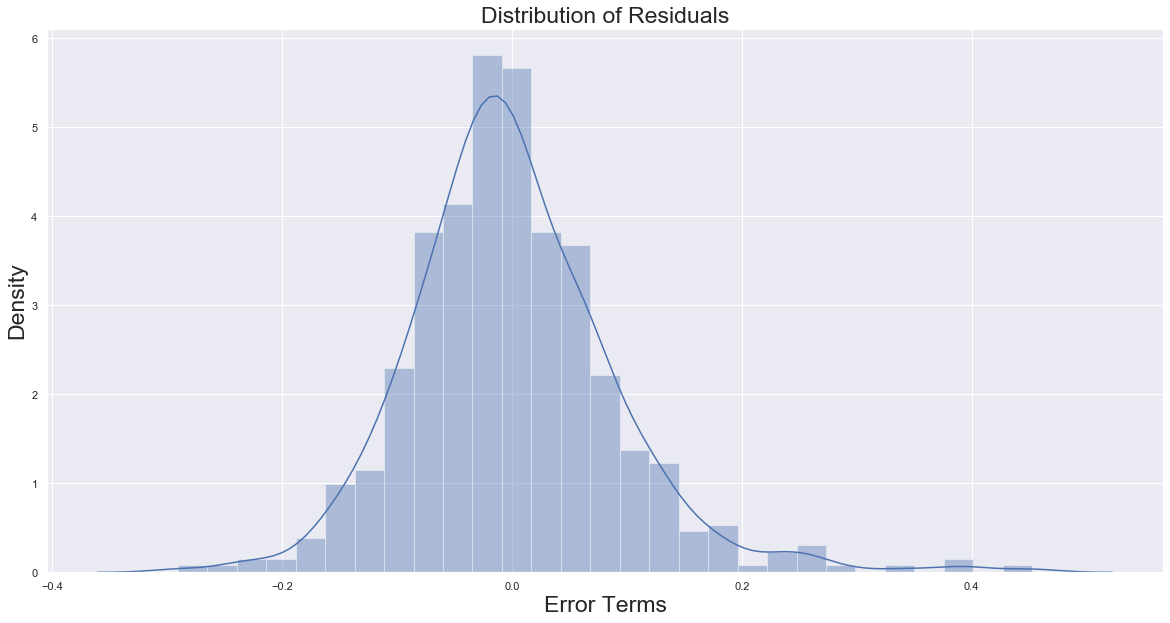

In [77]:
residual = y_train_pred - y_train
sns.set(rc={"figure.figsize":(20,10)})
sns.distplot(residual)
plt.xlabel('Error Terms', fontdict={'fontsize': 23})
plt.ylabel('Density', fontdict={'fontsize': 23})
plt.title('Distribution of Residuals', fontdict={'fontsize': 23})
plt.show()

##### <font color='red'> Observation:

Error Terms or Residuals are normally distributed</font>

## <font color='orange'>7b:Homoscedasticity</font> 

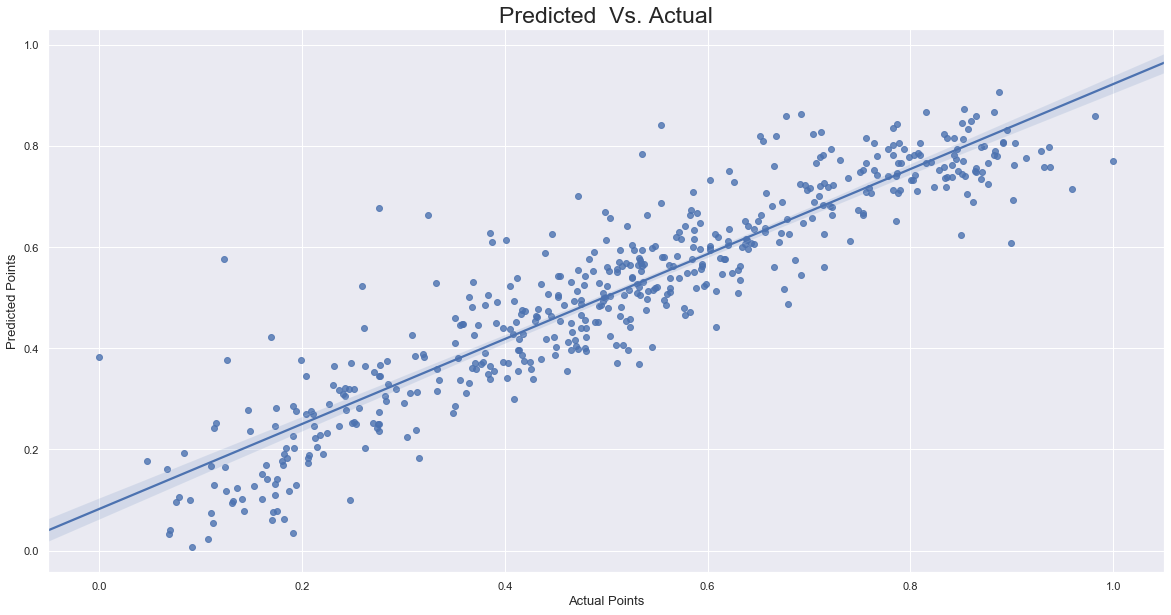

In [78]:
sns.set(rc={"figure.figsize":(20,10)})
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted  Vs. Actual', fontdict={'fontsize': 23})
plt.xlabel('Actual Points', fontdict={'fontsize': 13})
plt.ylabel('Predicted Points', fontdict={'fontsize': 13})
plt.show()

##### <font color='red'> Observation:

Error Terms have constant variance(Homoscedasticity)</font>

## <font color='orange'>7c:Error terms and independent</font> 

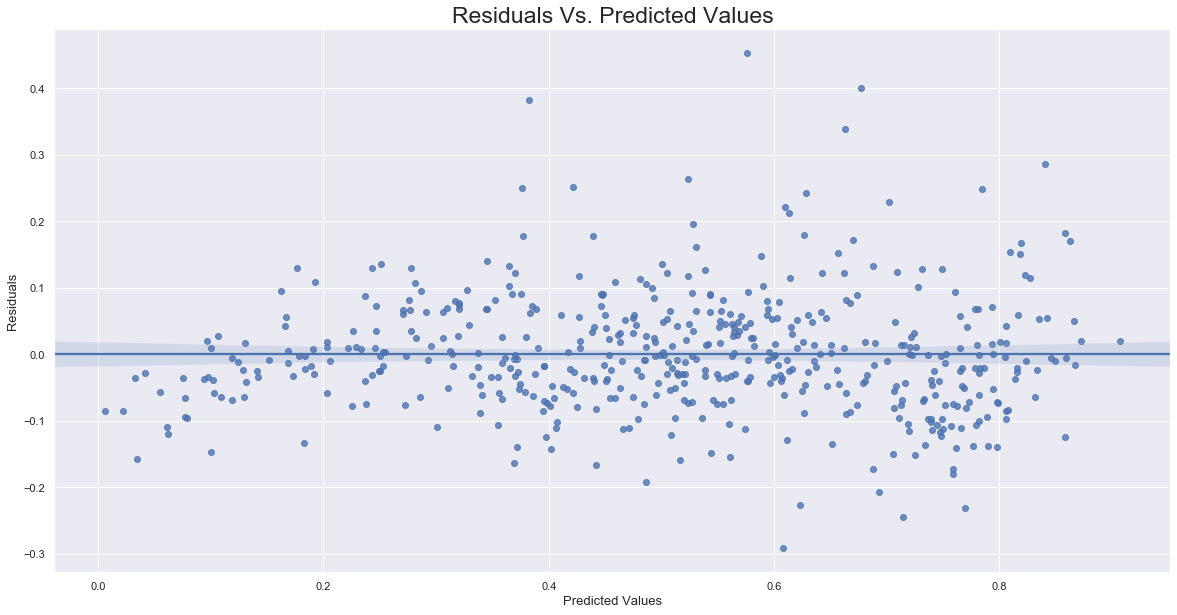

In [79]:
sns.set(rc={"figure.figsize":(20,10)})
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residuals Vs. Predicted Values', fontdict={'fontsize': 23})
plt.xlabel('Predicted Values', fontdict={'fontsize': 13})
plt.ylabel('Residuals', fontdict={'fontsize': 13})
plt.show()

##### <font color='red'> Observation:

Error Terms are independent of each other</font>

## <font color='orange'>7d:Multicollinearity</font> 

In [80]:
#Get VIF values
get_Vif_values(X_train_new1)

,Features,VIF
1,temp,5.25
2,windspeed,3.93
4,season_Winter,2.58
0,yr,2.06
3,season_Summer,1.94
9,mnth_Nov,1.78
13,weathersit_Mist,1.55
8,mnth_Jul,1.53
5,mnth_Dec,1.40
10,mnth_Sep,1.32


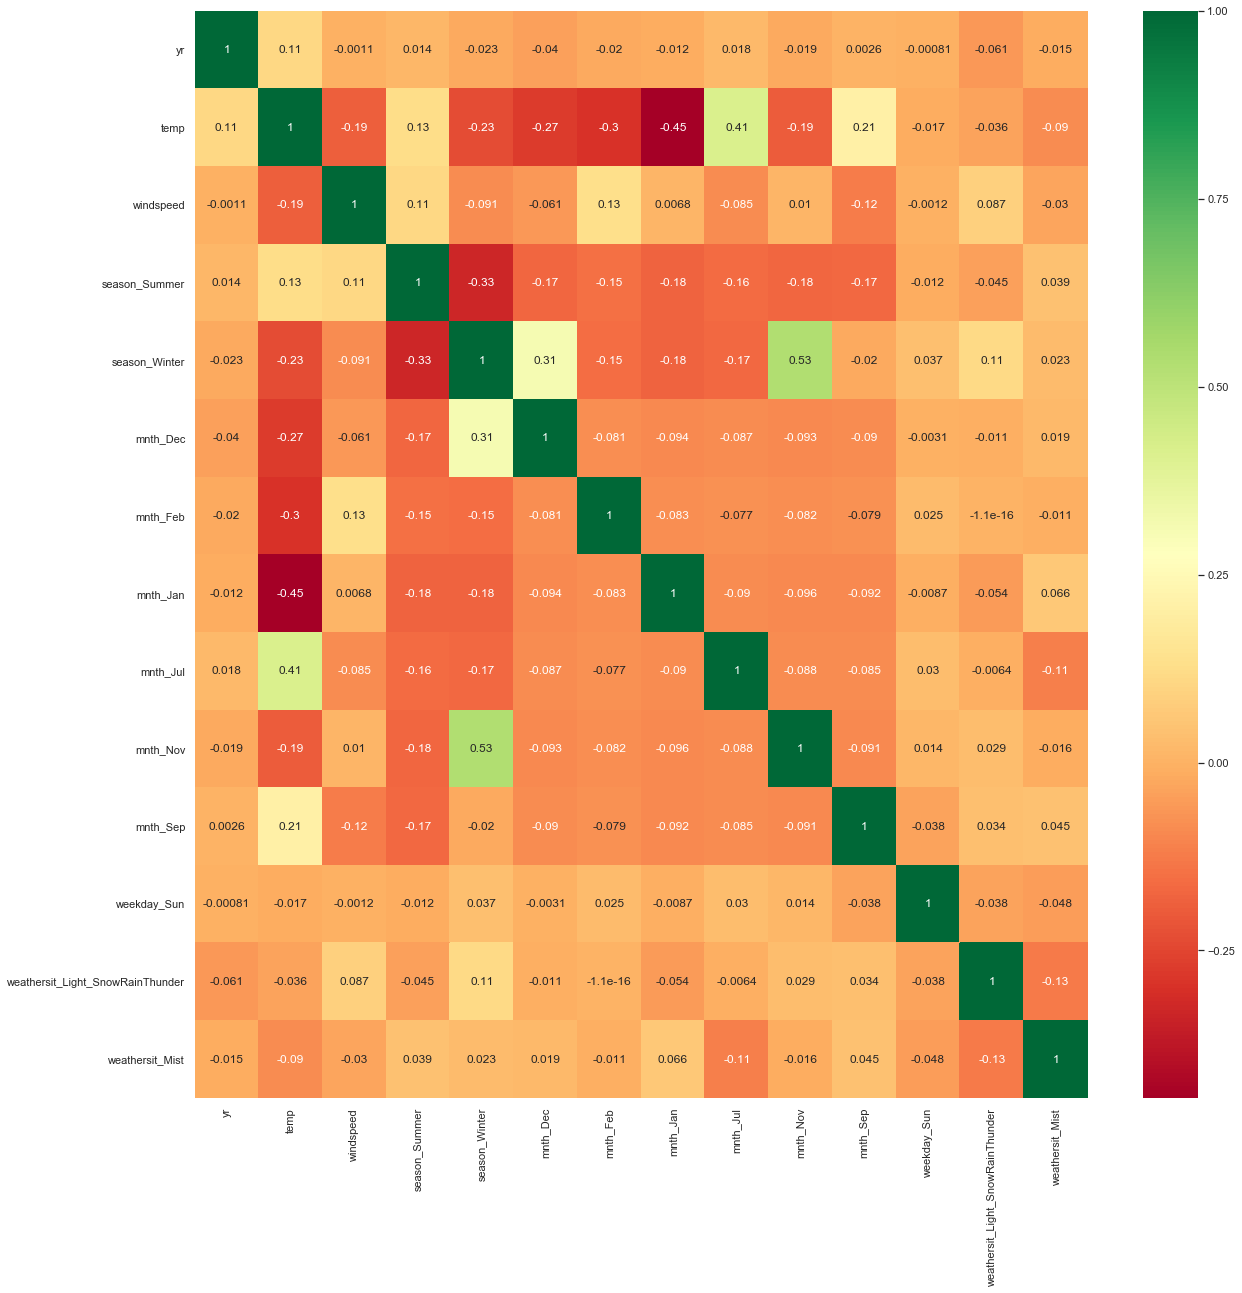

In [81]:
#Correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(X_train_new1.corr(),annot = True, cmap="RdYlGn")
plt.show()

##### <font color='red'> Observation:

VIF values and correlation heatmap shows there is no correlation between predictor variables</font>

# <font color='green'>Step8:Predictions on Test data</font>

## <font color='orange'>8a:Feature Scaling for Test data</font> 

In [82]:
#Do feature scaling for numeric variables in the test set
num= ['temp','hum','windspeed','cnt']
test[num] = scaler.transform(test[num])

In [83]:
test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_SnowRainThunder,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color='orange'>8b:Predictions on Test set</font> 

In [84]:
#Split the test set into X and y
y_test = test.pop('cnt')
X_test = test

In [85]:
# Creating X_test_new dataframe by using column names from X_train
X_test_new = X_test[X_train_new1.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [86]:
# Making predictions
y_pred = lm.predict(X_test_new)

# <font color='green'>Step9:Model Evaluation</font>

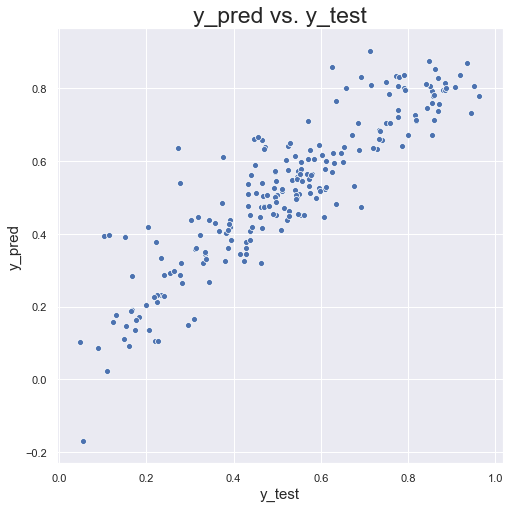

In [87]:
# Plotting y_test and y_pred to understand the spread
sns.set(rc={"figure.figsize":(8,8)})
sns.scatterplot(x=y_test, y=y_pred)
plt.title('y_pred vs. y_test', fontdict={'fontsize': 23})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_pred', fontdict={'fontsize': 15})
plt.show()

## <font color='orange'>9a:Equation of best fitted line</font> 

In [88]:
#Get the parameters of our model
round(lm.params,3)

const                               0.211
yr                                  0.234
temp                                0.474
windspeed                          -0.169
season_Summer                       0.057
season_Winter                       0.121
mnth_Dec                           -0.058
mnth_Feb                           -0.059
mnth_Jan                           -0.089
mnth_Jul                           -0.035
mnth_Nov                           -0.050
mnth_Sep                            0.074
weekday_Sun                        -0.047
weathersit_Light_SnowRainThunder   -0.293
weathersit_Mist                    -0.081
dtype: float64

### <font color='blue'>cnt = 0.211 + yr x 0.234 + temp x 0.474 - windspeed x 0.169 + season_Summer x 0.057 + season_Winter x 0.121 - mnth_Dec x 0.058 - mnth_Feb x 0.059 - mnth_Jan x 0.089 - mnth_Jul x 0.035 - mnth_Nov x 0.050 + mnth_Sep x 0.074 - weekday_Sun x 0.047 - weathersit_Light_SnowRainThunder x 0.293 -  weathersit_Mist x 0.081</font>     

## <font color='red'>Observations:
1.Temperature(temp) has largest positive co-efficient so an increase in temperature has maximum impact on the number of rides. 

2.Year, Seasons(Summer,Winter) and month-September also cause an increase in number of rides.

3.Windspeed,Sunday and Weather(Misty,Light_SnowRainThunder) causes a decrease in number of rides. 

4.Months(January,February,July,November,December) causes a decrease in number of rides.</font> 

## <font color='orange'>9b:Calculate R2 Score on Test set</font> 

In [89]:
#Print R2 score
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.8063916830073186


## <font color='orange'>9c:Calculate Adjusted R2 Score on Test set</font> 

In [90]:
# Calculating Adjusted-R2 Scorevalue for the test dataset

adjusted_r2_score = round(1-(1-r2_score)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),1)
print(adjusted_r2_score)

0.8
